# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import skimage.io as io

# Load annotations from COCO dataset

In [18]:
dataDir = './coco/'
dataType = 'val2017'
annFile_kps = '{}/annotations/person_keypoints_{}.json'.format(dataDir, dataType)
coco_kps = COCO(annFile_kps)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


# Get'person' category ID and get image ID with 'person' category

In [31]:
catIds = coco_kps.getCatIds(catNms=['person'])
imgIds = coco_kps.getImgIds(catIds=catIds)[:10]
print(imgIds)

[532481, 458755, 385029, 311303, 393226, 532493, 8211, 327701, 188439, 434204]


# Load and show the first 10 images with Keypoints

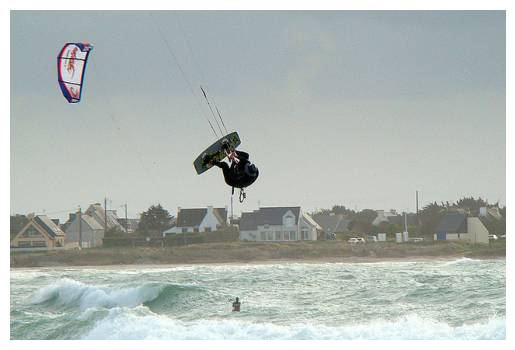

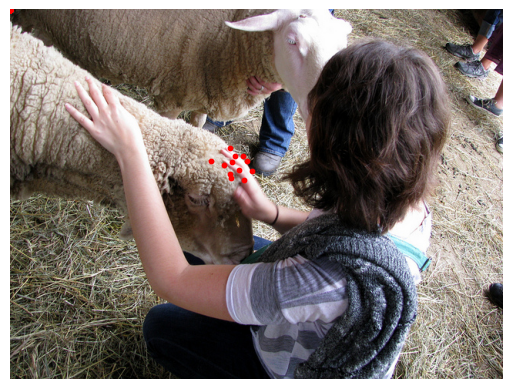

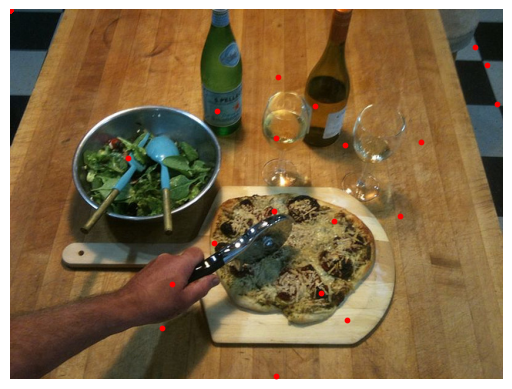

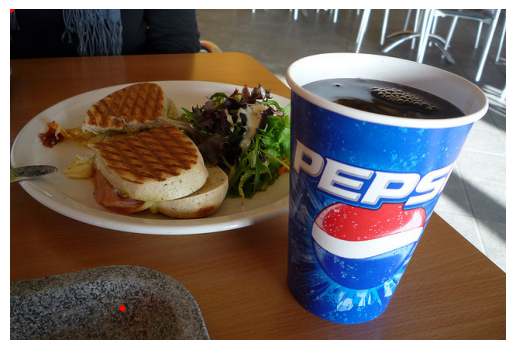

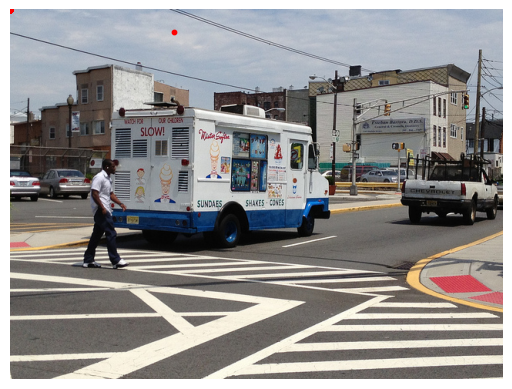

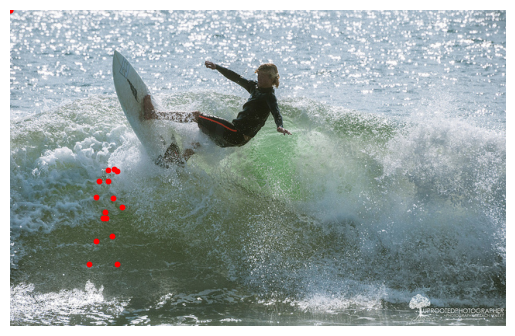

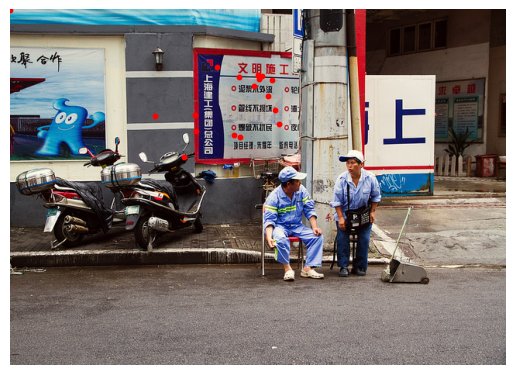

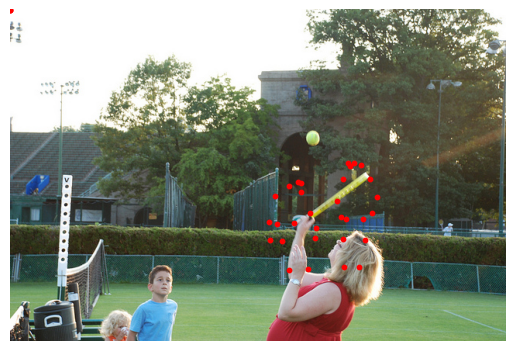

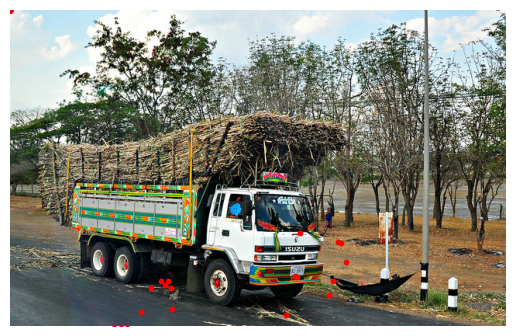

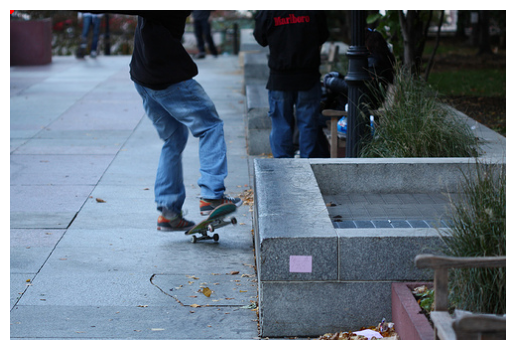

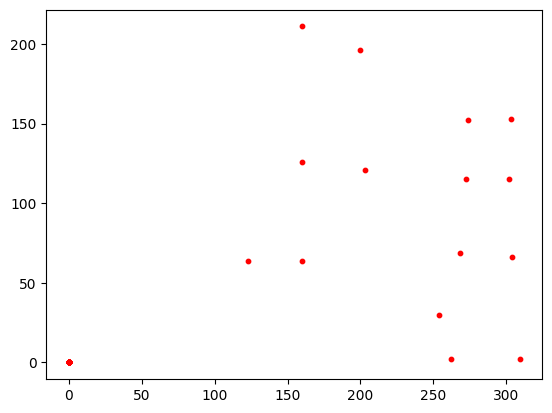

In [60]:
for imgId in imgIds:
    
    img_info = coco_kps.loadImgs(imgId)[0]
    img_url = img_info['coco_url']
    
    
    I = io.imread(img_url)
    plt.imshow(I)
    plt.axis('off')
    plt.show()
    
    
    annIds = coco_kps.getAnnIds(imgIds=imgId, catIds=catIds, iscrowd=None)
    anns = coco_kps.loadAnns(annIds)
    for ann in anns:
        keypoints = ann['keypoints']
        if keypoints:
            keypoints = np.array(keypoints).reshape(-1, 3)  
            x = keypoints[:, 0]
            y = keypoints[:, 1]
            plt.scatter(x, y, s=10, c='r')
    
    plt.imshow(I)
    plt.axis('off')
    plt.show()

# Show keypoints for actual image

In [59]:
#if anns:
    #ann = np.random.choice(anns)
    #keypoints = ann['keypoints']
    #if keypoints:
        #keypoints = np.array(keypoints).reshape(-1, 3)  
        #x = keypoints[:, 0]
        #y = keypoints[:, 1]
        #plt.scatter(x, y, s=10, c='r')

#plt.imshow(I)
#plt.axis('off')
#plt.show()